## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

# Assignment 1, Task 3: Dimensionality Reduction

This task is devoted to dimensionality reduction. How to map high-dimensional data into low-dimensional space is an interesting topic in the machine learning field. It is related to another hot topic -- unsupervised learning. In this section, you are going to learn two different methods for this dimensionality reduction.

* Principal Component Analysis (PCA)
* t-Distributed Stochastic Neighbor Embedding (t-SNE) 

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from utils.cifar_utils import load_data

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorf

## Load Data

We will use the CIFAR-10 dataset.

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_train = X_train.reshape([50000,3,32,32]).transpose((0,2,3,1))
X_test = X_test.reshape([10000,3,32,32]).transpose((0,2,3,1))
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
# Test data: 10000 samples from original test set: 1~10000
# Development data (for gradient check): 100 from the train set: 1~49000 #TODOTA is this 100 or 1000?
#num_training = 49000
num_training =49000
num_validation = 1000
num_dev = 100

X_val = X_train[-num_validation:]
y_val = y_train[-num_validation:]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

X_train = X_train[:num_training]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data
mean_image = np.mean(X_train, axis=0)

X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image
X_dev = X_dev.astype(np.float32) - mean_image

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(49000, 32, 32, 3) (1000, 32, 32, 3) (10000, 32, 32, 3) (100, 32, 32, 3)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Development data shape: (100, 32, 32, 3)
Development data shape (100,)


## Part 1: Principal Component Analysis (PCA)

<span style="color:red"><strong>TODO</strong></span>: You have to complete the code in **./utils/features/pca.py**.

### Naive PCA

In [3]:
from utils.features.pca import pca_naive

X_patch = X_train[:,:,:,0]
X_patch = np.reshape(X_patch, (X_patch.shape[0], -1))


In [4]:
# Start PCA
K = 300
P, T = pca_naive(X_patch, K)

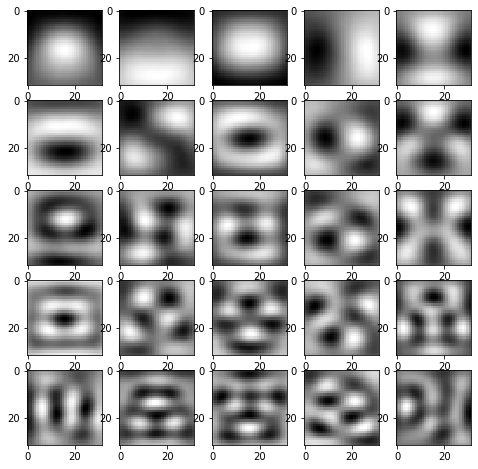

In [6]:
# Show principle components of P using a 5x5 subplot
# Visualize P
r = 5
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = np.reshape(P[r*i+j], [32,32])
        axarr[i][j].imshow(img, cmap="gray")

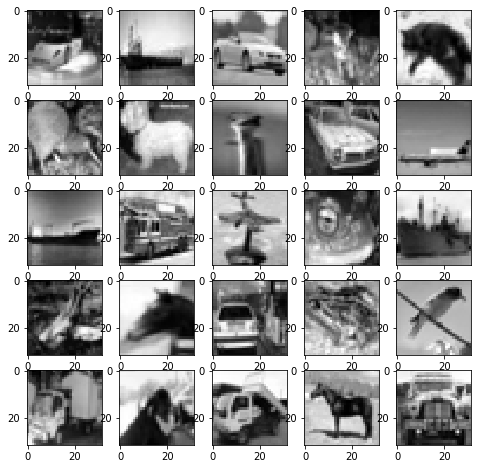

In [7]:
# Select a small set of images for test
#num_training = 5000
num_training = 5000
num_pca = 25
mask = np.random.choice(num_training, num_pca, replace=False)
X_pca = X_train[mask,:,:,0]

# Visualize one channel of images 
r = 5
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_pca[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

(32, 32)


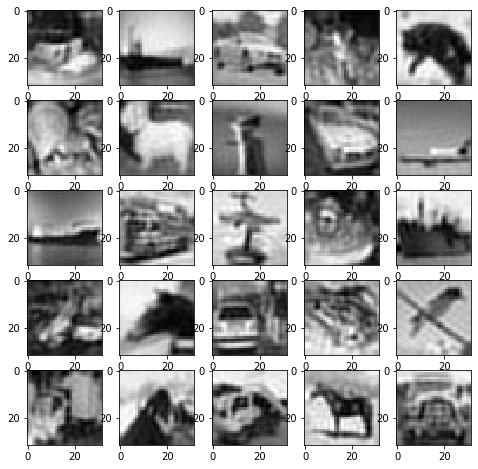

In [8]:
# Test your result
# Reduce dimension with P
X_features = []

for n in range(num_pca):
    img = X_pca[n]
    feature = np.dot(P, np.reshape(img, (-1,)))
    X_features.append(feature)


# Reconstruct image
X_recon = []
for n in range(num_pca):
    feature = X_features[n]
    img = np.reshape(np.dot(feature, P), (32,32))
    X_recon.append(img)
print(img.shape)
# Visualize results
r = 5
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_recon[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

### PCA + Neural network

<span style="color:red"><strong>TODO</strong></span>: Use PCA to preprocess images before training a neural network: 

1. Do PCA preprocessing on each channel of the original image separately.
2. Stack PCA features from three channels into one vector, and use that vector as an input for MLP.
3. Train the MLP and show the results. 

In [9]:
from utils.train_funcs import train, test
from utils.classifiers.mlp import MLP

## TODO: pca preprocessing -> mlp classification
## Creating Training Sets for features####
X_patch1 = X_train[:,:,:,0]
X_patch1 = np.reshape(X_patch1, (X_patch1.shape[0], -1))
X_patch2 = X_train[:,:,:,1]
X_patch2 = np.reshape(X_patch2, (X_patch2.shape[0], -1))
X_patch3 = X_train[:,:,:,2]
X_patch3 = np.reshape(X_patch3, (X_patch3.shape[0], -1))

##################################Val_SET################
X_val1 = X_val[:,:,:,0]
X_val1 = np.reshape(X_val1, (X_val1.shape[0], -1))
X_val2 = X_val[:,:,:,1]
X_val2 = np.reshape(X_val2, (X_val2.shape[0], -1))
X_val3 = X_val[:,:,:,2]
X_val3 = np.reshape(X_val3, (X_val3.shape[0], -1))

##################################Test_SET################
X_test1 = X_test[:,:,:,0]
X_test1 = np.reshape(X_test1, (X_test1.shape[0], -1))
X_test2 = X_test[:,:,:,1]
X_test2 = np.reshape(X_test2, (X_test2.shape[0], -1))
X_test3 = X_test[:,:,:,2]
X_test3 = np.reshape(X_test3, (X_test3.shape[0], -1))


In [10]:
######################SUPER_IMPORTANT_VALUE###### CHANGES_EVERYTHING####
K = 100

In [11]:
#Creating Eigen_Vectors for each channel####
P1, T1 = pca_naive(X_patch1, K)
print("P1 done")
P2, T2 = pca_naive(X_patch2, K)
print("P2 done")
P3, T3 = pca_naive(X_patch3, K)
print("P3 done")

P1 done
P2 done
P3 done


In [12]:
#####Creating_reduced dimension for each image###

def get_features_naive(K,P1,P2,P3,X_patch1,X_patch2,X_patch3):
    features = np.zeros((X_patch1.shape[0],3*K))
    print(len(X_patch1))
    for i in range (0, len(X_patch1)):
        feature1 = np.dot(P1, np.reshape(X_patch1[i], (-1,)))
        feature2 = np.dot(P2, np.reshape(X_patch2[i], (-1,)))
        feature3 = np.dot(P3, np.reshape(X_patch3[i], (-1,)))
        features[i][:K] = feature1
        features[i][K:2*K] = feature2
        features[i][2*K:3*K] = feature3
    print(feature1.shape)
    print(features.shape)
    print(features[1])
    return features

def get_features(P1,P2,P3,X_patch1,X_patch2,X_patch3):
    feature1 = np.transpose(np.dot(P1, np.transpose(X_patch1)))
    feature2 = np.transpose(np.dot(P2, np.transpose(X_patch2)))
    feature3 = np.transpose(np.dot(P3, np.transpose(X_patch3)))
    feature_new = np.hstack((feature1,feature2,feature3))
    return feature_new

In [13]:
##########Training_Set_&_Val_Set_&_Test_Set_in_features#########
X_train_set = get_features(P1,P2,P3,X_patch1,X_patch2,X_patch3)
X_val_set = get_features(P1,P2,P3,X_val1,X_val2,X_val3)
X_test_set = get_features(P1,P2,P3,X_test1,X_test2,X_test3)

In [14]:
########Neural_Net_&_Testing#####
from utils.classifiers.mlp import MLP
model = MLP(input_dim=K*3, hidden_dims=[500, 50], num_classes=10, reg=0.000001, weight_scale=1e-3)
num_epoch = 40
batch_size = 500
lr = 1e-2
verbose = True
train_acc_hist, val_acc_hist = train(model, X_train_set, y_train, X_val_set, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test_set, y_test)


number of batches for training: 98
5000/49000 loss: 2.3021391894822645
10000/49000 loss: 2.301089425123992
15000/49000 loss: 2.2965168605153443
20000/49000 loss: 2.2591095658004168
25000/49000 loss: 2.2262432254044553
30000/49000 loss: 2.232526109678201
35000/49000 loss: 2.21204882465116
40000/49000 loss: 2.197210155728556
45000/49000 loss: 2.198500692564338
epoch 1: valid acc = 0.168, new learning rate = 0.0095
5000/49000 loss: 2.2022212052455132
10000/49000 loss: 2.2065291809575975
15000/49000 loss: 2.2023032361381083
20000/49000 loss: 2.1664158376573623
25000/49000 loss: 2.166268349407579
30000/49000 loss: 2.1821305502727757
35000/49000 loss: 2.178023691426017
40000/49000 loss: 2.1734128544013043
45000/49000 loss: 2.158390938049078
epoch 2: valid acc = 0.167, new learning rate = 0.009025
5000/49000 loss: 2.1441440392145146
10000/49000 loss: 2.1862284622953734
15000/49000 loss: 2.142193496740795
20000/49000 loss: 2.1702177049771034
25000/49000 loss: 2.20718004414401
30000/49000 loss:

40000/49000 loss: 1.2279182480491773
45000/49000 loss: 1.254596151294583
epoch 21: valid acc = 0.525, new learning rate = 0.0034056162628811476
5000/49000 loss: 1.3499792313407062
10000/49000 loss: 1.229934878486052
15000/49000 loss: 1.3020875212392824
20000/49000 loss: 1.3586947091618666
25000/49000 loss: 1.2762558880845811
30000/49000 loss: 1.2727962839558247
35000/49000 loss: 1.2934896703194139
40000/49000 loss: 1.1624507185187534
45000/49000 loss: 1.3609352120086802
epoch 22: valid acc = 0.51, new learning rate = 0.0032353354497370902
5000/49000 loss: 1.1886775134517304
10000/49000 loss: 1.182784504532737
15000/49000 loss: 1.229638906757354
20000/49000 loss: 1.2260195389589317
25000/49000 loss: 1.2239935551294119
30000/49000 loss: 1.2610147416773532
35000/49000 loss: 1.3389366534513734
40000/49000 loss: 1.335612464955442
45000/49000 loss: 1.2912325936948352
epoch 23: valid acc = 0.542, new learning rate = 0.0030735686772502355
5000/49000 loss: 1.212817744581741
10000/49000 loss: 1.

0.5462

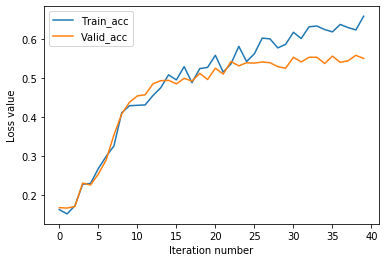

In [15]:
plt.plot(train_acc_hist, label='Train_acc')
plt.plot(val_acc_hist, label='Valid_acc')
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.legend()
plt.show()

<span style="color:red"><strong>TODO</strong></span>: Plot training, validation and test set accuracy.

In [12]:
## TODO:
# plot the accuracy history

## Part 2: t-SNE (optional, bonus +10 points)

t-SNE is is a machine learning algorithm for nonlinear dimensionality reduction developed by Geoffrey Hinton and Laurens van der Maaten. It is also a good way of visualizing high-dimensional data in 2D. We show its application for CIFAR10. Later it will be re-used in a CNN network. Experimenting with t-SNE can be fun. One thing to try is to visualize the output of each layer of MLP to observe the differences.

<p style="line-height: 1.2;">[1] Maaten, Laurens van der, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of Machine Learning Research 9.Nov (2008): 2579-2605.</p>
<p style="line-height: 1.2;">[2] Adaptive learning rate scheme by Jacobs https://www.willamette.edu/~gorr/classes/cs449/Momentum/deltabardelta.html</p>
<p style="line-height: 1.2;">[3] http://cs.stanford.edu/people/karpathy/cnnembed/</p>
<p style="line-height: 1.2;">[4] How to Use t-SNE Effectively, with examples.
 https://distill.pub/2016/misread-tsne</p>

In [71]:
from utils.features.tsne import tsne

#### tSNE of original data

In [72]:
random_select = np.random.choice(10000, 500, replace=False)
X = X_test[random_select,:,:,0].reshape(500,1024).astype('float')/255.0
tic = time.time()
Y = tsne(X, low_dim=2, perplexity=30.0)
print("it takes {} seconds".format(time.time()-tic))

2.4965130922799283
The 100 th loop cost: 15.192235233301705, computation time: 3.7476909160614014
The 200 th loop cost: 1.1462869227789672, computation time: 7.712617635726929
The 300 th loop cost: 1.1414158845336975, computation time: 11.365158319473267
The 400 th loop cost: 1.1413302650786694, computation time: 15.123578071594238
The 500 th loop cost: 1.1413298644771324, computation time: 18.849681854248047
The 600 th loop cost: 1.141329862936857, computation time: 22.579164266586304
The 700 th loop cost: 1.1413298629300264, computation time: 26.227490186691284
The 800 th loop cost: 1.1413298629299797, computation time: 29.957738876342773
The 900 th loop cost: 1.141329862929979, computation time: 33.787957429885864
The 1000 th loop cost: 1.1413298629299786, computation time: 37.55495643615723
it takes 38.79056692123413 seconds


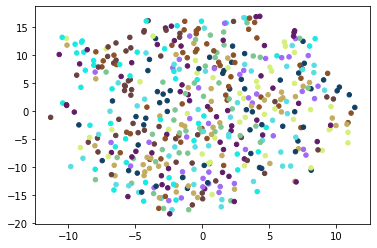

In [73]:
## visualize tSNE of original data
labels = y_test[random_select]
colors = np.random.rand(10,3)
color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(Y[:,0], Y[:,1], 20, color_labels)
plt.show()

#### tSNE of data after two hidden layers

Do visualization of the tSNE of data after going through MLP. In the visualization result, you should find that in comparison with the tSNE of original data where all data points mess up with each other. While the tSNE of data after two-layer networks would be shown as multiple clusters in a 2D panel.

In [75]:
# Define MLP model
model = MLP(input_dim=K*3, hidden_dims=[100], num_classes=10, reg=0.1, weight_scale=1e-3)

num_epoch = 10
batch_size = 200
lr = 1e-3
verbose = False
train_acc_hist, val_acc_hist = train(model, X_train_set, y_train, X_val_set, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test_set, y_test)

number of batches for training: 245


ValueError: cannot reshape array of size 60000 into shape (200,3072)

<span style="color:red"><strong>TODO</strong></span>: Do visualization of the tSNE of data after going through MLP. 

In [ ]:
# run tSNE
X = X_test[random_select]
tic = time.time()
# TODO:
# You need to first go through two hidden layers.




# End TODO
print("it takes {} seconds".format(time.time()-tic))

In [ ]:
# TODO:
# visualize tSNE 2D representation of data after two hidden layers

<span style="color:red"><strong>TODO</strong></span>: Try tuning the parameters of tSNE, do visualization of the new tSNE of data.

In [ ]:
# TODO:
# Tune the parameter, show the results.
# run tSNE
X = X_test[random_select]




print("it takes {} seconds".format(time.time()-tic))

In [ ]:
# TODO:
# visualize tSNE 2D representation of data after two hidden layers